## Final Project Submission
* Student name: Stephen Cibik
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## First a look at the data:

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('dark_background')

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### We can see that there are quite a number of missing values in 'waterfront' and 'yr_renovated' by using .info()
 - There are also just a few missing from 'view'

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## A running guide of column descriptions:
 - id: identification number for a house
 - date: date the house was sold
 - price: the prediction target, how much the house sold for
 - bedrooms: # of bedrooms in the house
 - bathrooms: # of bathrooms in the house
 - sqft_living: square footage of the home
 - sqft_lot: square footage of the lot
 - floors: total number of levels in the house
 - waterfront: house which has a view to a waterfront
 - view: # of times house has been viewed
 - condition: how good the overall condition is on a scale between 1-5
 - grade: overall grade given to house by King County grading system (1-13)
 - sqft_above: square footage of house apart from basement
 - sqft_basement: square footage of the basement
 - yr_built: year house was built
 - yr_renovated: year when house was renovated (will be 0 if N/A)
 - zipcode: the zipcode for the house
 - lat: latitude coordinate
 - long: longitude coordinate
 - sqft_living15: living room area in 2015 (implies renovation, may affect lot size)
 - sqft_lot15: lot area in 2015 (renovation sensitive)

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


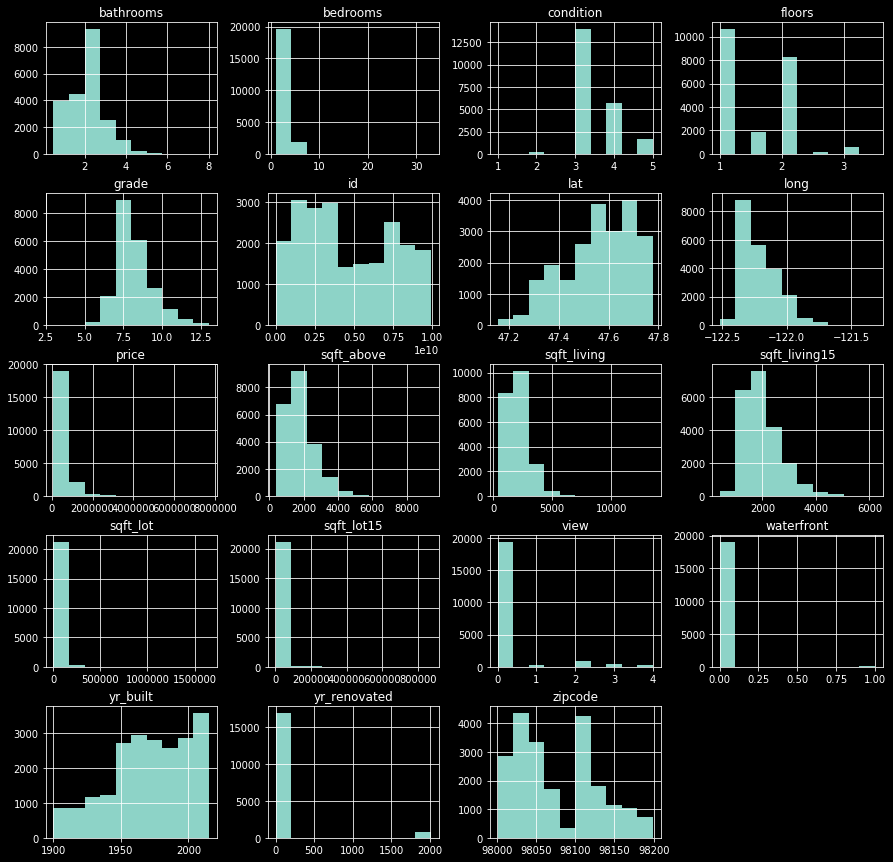

In [151]:
df.hist(figsize=(15,15));

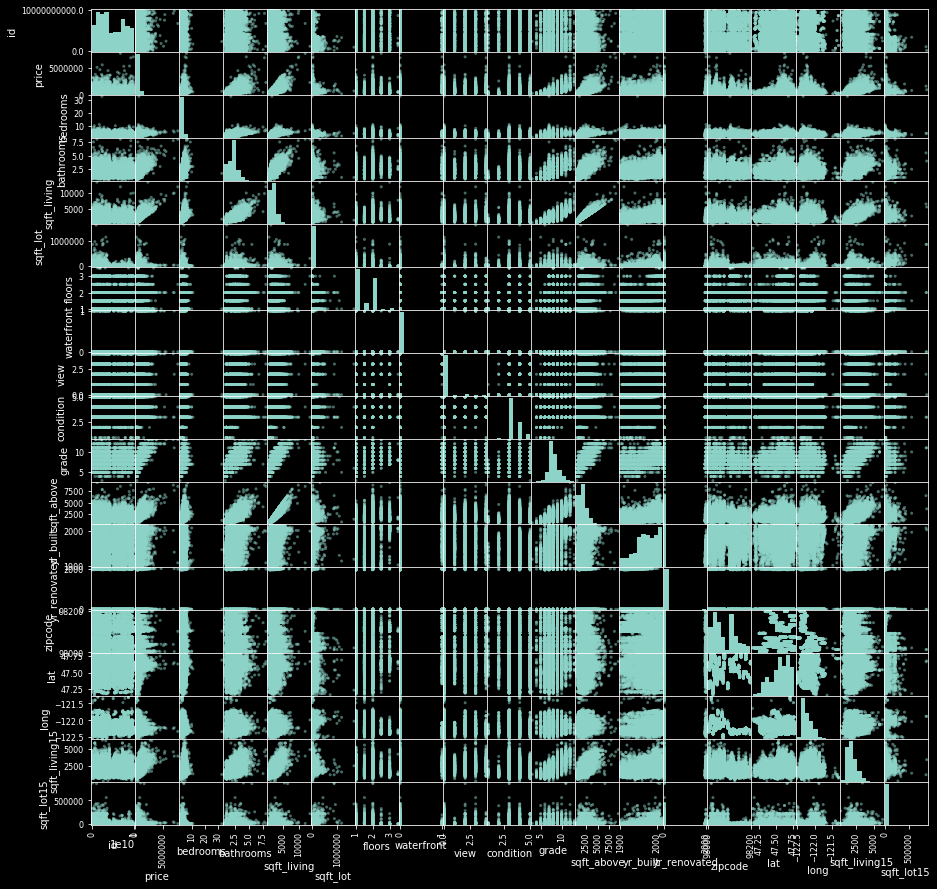

In [276]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

## Notes from Scatter Matrix:
### On correlations:
 - Clear positive correlation btw sqft_above, bathrooms, grade, and sqft_living
 - The same thing can be seen with price: bathrooms and sqft_living seem more important than the number of bedrooms
 - Price appears to be correlated with sqft_living, sqft_living15, sqft_above, grade, bathrooms, and even a bit with lat

### On distributions:
 - Few of the features are normally distributed from the start, some transformation may be helpful.
 - Right away I can see that the grade is close to normally distributed already. This may be a result of how the scoring was done by King County.
 - Distributions which have positive skew and look like they may benefit from log transformation include:
     - bathrooms
     - floors
     - sqft_living
     - sqft_above
     - zipcode?
     - long
     - sqft_living15
 - lat also has a normalish distribution with negative skew

## We can use Pandas to look at Pearson correlation coefficients between our raw features, and Seaborn to produce a heatmap:

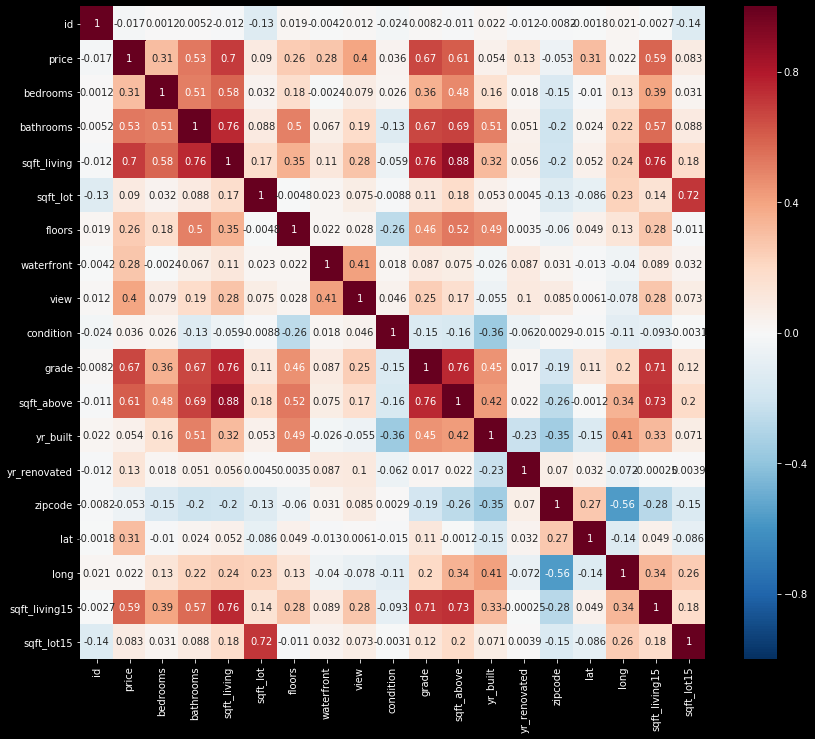

In [58]:
import seaborn as sns

correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

### Despite the fact that we can already see strong colinearity between some variables, I am going to leave them all in for now, then later drop based on p-values.

## I am going to go ahead and drop the 'id' column, since it shows no correlation to price.

In [59]:
df.drop(columns=['id'],inplace=True)

# Fixing sqft_basement:
 - The column has so far been invisible as it was not a numeric datatype, caused by '?' notation for its NaN values. These missing values can be calculated by subtracting the sqft_above column from the sqft_living column, and may still prove to be a valuable predictor.

In [60]:
df[['sqft_living','sqft_above','sqft_basement']].head()

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0


In [61]:
df[df['sqft_basement']=='?'][['sqft_living','sqft_above','sqft_basement']].head()

,sqft_living,sqft_above,sqft_basement
6,1715,1715,?
18,1200,1200,?
42,3595,3595,?
79,3450,3450,?
112,1540,1160,?


In [62]:
#Check number of ?'s
df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [63]:
#create new column by subtracting
df['sqft_basement2'] = df.sqft_living - df.sqft_above
df.sqft_basement2.head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement2, dtype: int64

In [64]:
#replace ?'s with numbers so the column can be converted to numeric for comparison
df.loc[df['sqft_basement']=='?',['sqft_basement']] = '99999'
df[df['sqft_basement']=='99999'].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,1715,99999,1995,0.0,98003,47.3097,-122.327,2238,6819,0
18,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,4,...,1200,99999,1921,0.0,98002,47.3089,-122.210,1060,5095,0
42,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,...,3595,99999,2014,0.0,98053,47.6848,-122.016,3625,5639,0
79,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,3,...,3450,99999,2002,0.0,98010,47.3420,-122.025,3350,39750,0
112,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,4,...,1160,99999,1980,0.0,98038,47.3624,-122.031,1540,11656,380


In [65]:
df.sqft_basement.head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [66]:
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement.head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

In [67]:
df.sqft_basement2 = df.sqft_basement2.astype('float64')
df.sqft_basement2.head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement2, dtype: float64

### I will check to see if there are any discrepencies in calculated sqft_basement values with the given ones, if there are none I will drop the old column for the new one

In [68]:
df['error_check'] = np.where(df['sqft_basement']==df['sqft_basement2'], True, False)
df.error_check.head()

0    True
1    True
2    True
3    True
4    True
Name: error_check, dtype: bool

In [69]:
len(df) - df.error_check.sum()

454

### There should be the same number of errors as there were '?'s in the original dataset.

In [70]:
len(df[df['sqft_basement']==99999])

454

## We see that there are the same number of discrepancies with the new basement sqare footage values as there were missing values in the original dataset.
 - this means that there were no discrepancies with known values. This means the old column can be replaced entirely with the newly calculated column.

In [71]:
df.drop(columns=['sqft_basement'], inplace=True)

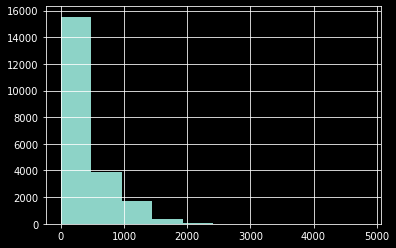

In [72]:
df.sqft_basement2.hist()

## Since sqft_basement2 is mostly an indicator of whether a house has a basement or not, I am going to turn it into a binary variable.

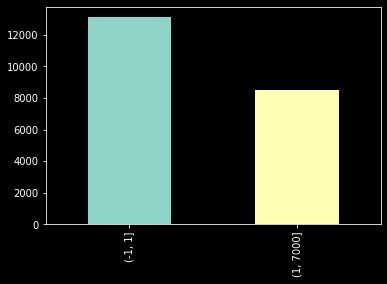

In [73]:
basement_bins = [-1,1,7000]

basement_cuts = pd.cut(df['sqft_basement2'], basement_bins)
basement_cuts.value_counts().plot(kind='bar')

In [74]:
basement_codes = basement_cuts.cat.codes
basement_dummies = pd.get_dummies(basement_codes, prefix='basement', drop_first=True)
basement_dummies.rename(columns={'basement_1':'has_basement'}, inplace=True)
basement_dummies.head()

,has_basement
0,0
1,1
2,0
3,1
4,0


In [75]:
df = pd.concat([df,basement_dummies], axis=1)
df.drop(columns=['sqft_basement2','error_check'],inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


## Now we need to deal with the date. My first inclination was to drop it, but I think I will convert it into a useable format and see how it behaves as a predictor just for good measure.

In [76]:
df.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [77]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['date'] = df.date.map(dt.datetime.toordinal)
df.date.head()

0    735519
1    735576
2    735654
3    735576
4    735647
Name: date, dtype: int64

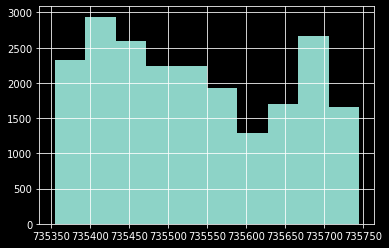

In [78]:
df.date.hist()

# Now to deal with the 'yr_renovated' feature

In [79]:
df.yr_renovated.isnull().sum()

3842

## That's a lot of missing values
- I am going to start by making the assumption that houses with no data for renovation are probably not renovated, and replace all of these values with zeroes.

In [80]:
df.yr_renovated.fillna(value=0,inplace=True)

In [81]:
df.yr_renovated.isnull().sum()

0

## Since this makes yr_renovated mostly zeroes, I am going too break it into categories for easier analysis.

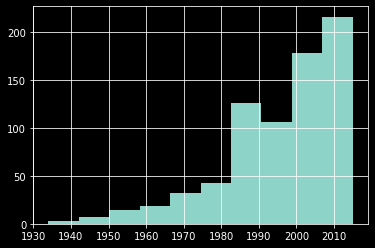

In [82]:
df[df['yr_renovated']>0].yr_renovated.hist();

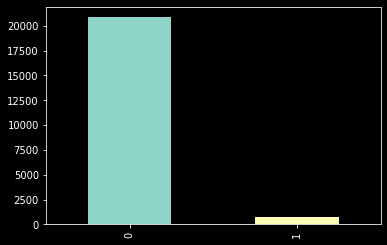

In [84]:
bins = [-1,1,2020]
bins_renovation = pd.cut(df['yr_renovated'], bins)
renovation_codes = bins_renovation.cat.codes
renovation_codes.value_counts().plot(kind='bar')

In [85]:
renovation_dummy = pd.get_dummies(renovation_codes, prefix='renovation', drop_first=True)
renovation_dummy.head()
df = df.drop(columns=['yr_renovated'])
df = pd.concat([df,renovation_dummy],axis=1)
df.rename(columns={'renovation_1':'is_renovated'}, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,renovation_1
0,735519,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,735576,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,735654,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,735576,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,735647,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


## Now to fix Waterfront:
 - I think the best way to deal with the missing values in this column is to replace them with zeroes. I have tried a different way of treating the missing values as a seperate category, but it did not improve model results. It is likely that a house on the waterfront would have that included in it's data.

In [88]:
df.waterfront.fillna(value=0,inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
has_basement     21597 non-null uint8
is_renovated     21597 non-null uint8
dtypes: float64(7), int64(11), uint8(2)
memory usage: 3.0 MB


### Just a few values to fix in 'view'. I think replacing them with the mode (zero) will be fine since the vast majority of entries are zero, and the reason the data is missing may be because the house was not viewed, which would be a zero.

In [90]:
df.view.fillna(value=0,inplace=True)

In [91]:
df.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
yr_built         False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
has_basement     False
is_renovated     False
dtype: bool

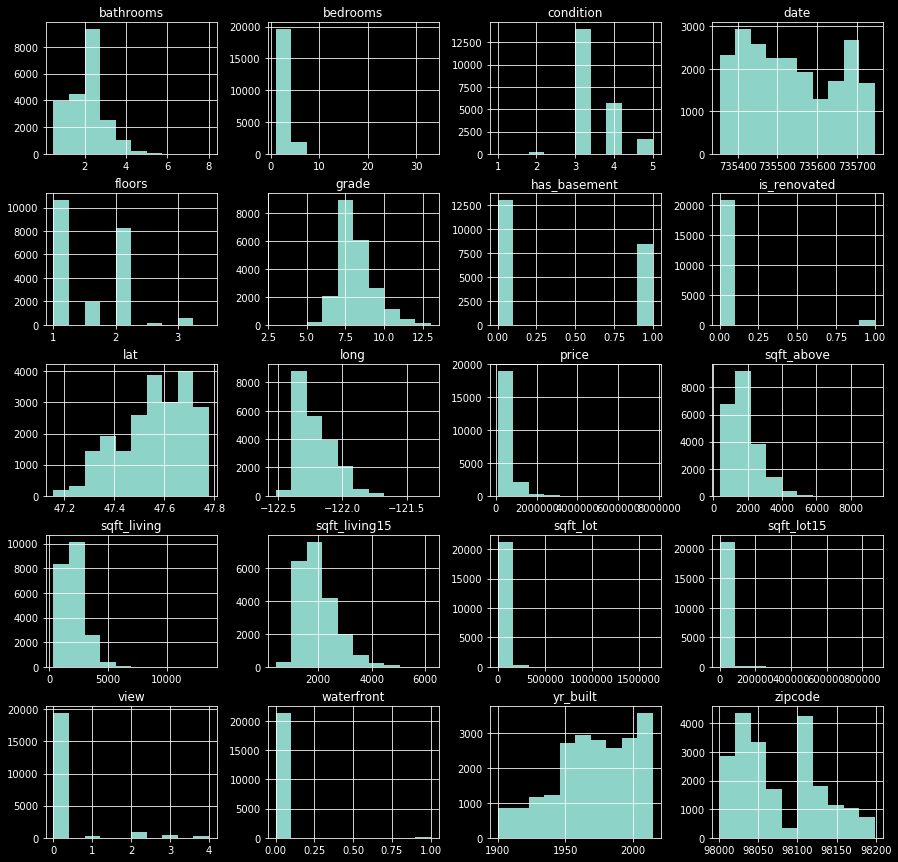

In [92]:
df.hist(figsize=(15,15));

## Just a quick and dirty regression to see where we're at:

In [93]:
data = df.drop(columns=['price'])
target = df['price']

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
linreg.score(X_test, y_test)

0.6943743469686178

# Now we are ready for recursive feature selection:

### Starting with Forward Backward selection:

In [96]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [97]:
included = stepwise_selection(data, target)
selected = data[included]
selected.head()

Add  view                           with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat                            with p-value 0.0
Add  waterfront                     with p-value 1.29672e-257
Add  bedrooms                       with p-value 8.75416e-67
Add  zipcode                        with p-value 1.06383e-41
Add  long                           with p-value 9.42956e-55
Add  condition                      with p-value 8.63288e-20
Add  sqft_above                     with p-value 8.44593e-22
Add  date                           with p-value 4.23425e-21
Add  is_renovated                   with p-value 4.01486e-09
Add  sqft_living15                  with p-value 2.81293e-09
Add  sqft_lot15                     with p-value 6.168e-07
Add  sqft_lot                       with p-value 0.00957392


,view,bathrooms,grade,yr_built,sqft_living,lat,waterfront,bedrooms,zipcode,long,condition,sqft_above,date,is_renovated,sqft_living15,sqft_lot15,sqft_lot
0,0.0,1.00,7,1955,1180,47.5112,0.0,3,98178,-122.257,3,1180,735519,0,1340,5650,5650
1,0.0,2.25,7,1951,2570,47.7210,0.0,3,98125,-122.319,3,2170,735576,1,1690,7639,7242
2,0.0,1.00,6,1933,770,47.7379,0.0,2,98028,-122.233,3,770,735654,0,2720,8062,10000
3,0.0,3.00,7,1965,1960,47.5208,0.0,4,98136,-122.393,5,1050,735576,0,1360,5000,5000
4,0.0,2.00,8,1987,1680,47.6168,0.0,3,98074,-122.045,3,1680,735647,0,1800,7503,8080


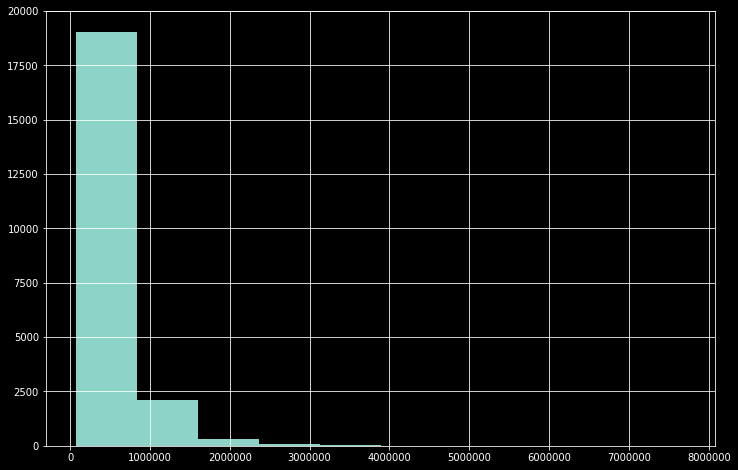

In [98]:
target.hist(figsize=(12,8))

In [99]:
from statsmodels.formula.api import ols

outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2979.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:48:07   Log-Likelihood:            -2.9435e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21579   BIC:                         5.889e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.074e+07    9.4e+06     -8.591      0.000   -9.92e+07   -6.23e+07
view           5.313e+04   2117.553     25.092      0.000     4.9e+04    5.73e+04
bathrooms      4.363e+04   3140.119     13.896      0.000    3.75e+04    4.98e+04
grade          9.764e+04   2147.963     45.457      0.000    9.34e+04    1.02e+05
yr_built      -2605.5288     70.134    -37.151      0.000   -2742.996   -2468.062
sqft_living     146.7775      4.173     35.173      0.000     138.598     154.957
lat            6.052e+05   1.07e+04     56.639      0.000    5.84e+05    6.26e+05
waterfront     6.184e+05   1.81e+04     34.163      0.000    5.83e+05    6.54e+05
bedrooms      -3.612e+04   1896.508    -19.048      0.000   -3.98e+04   -3.24e+04
zipcode        -576.8682     32.785    -17.595      0.000    -641.129    -512.607
long           -2.19e+05   1.31e+04    -16.738      0.000   -2.45e+05   -1.93e+05
condition      2.778e+04   2341.497     11.866      0.000    2.32e+04    3.24e+04
sqft_above       35.0813      3.900      8.994      0.000      27.436      42.726
date            117.2106     12.133      9.660      0.000      93.429     140.992
is_renovated   4.911e+04   7918.163      6.203      0.000    3.36e+04    6.46e+04
sqft_living15    21.0881      3.422      6.163      0.000      14.381      27.795
sqft_lot15       -0.3951      0.073     -5.400      0.000      -0.538      -0.252
sqft_lot          0.1239      0.048      2.591      0.010       0.030       0.218
==============================================================================
Omnibus:                    18332.785   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1842014.945
Skew:                           3.558   Prob(JB):                         0.00
Kurtosis:                      47.680   Cond. No.                     5.10e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

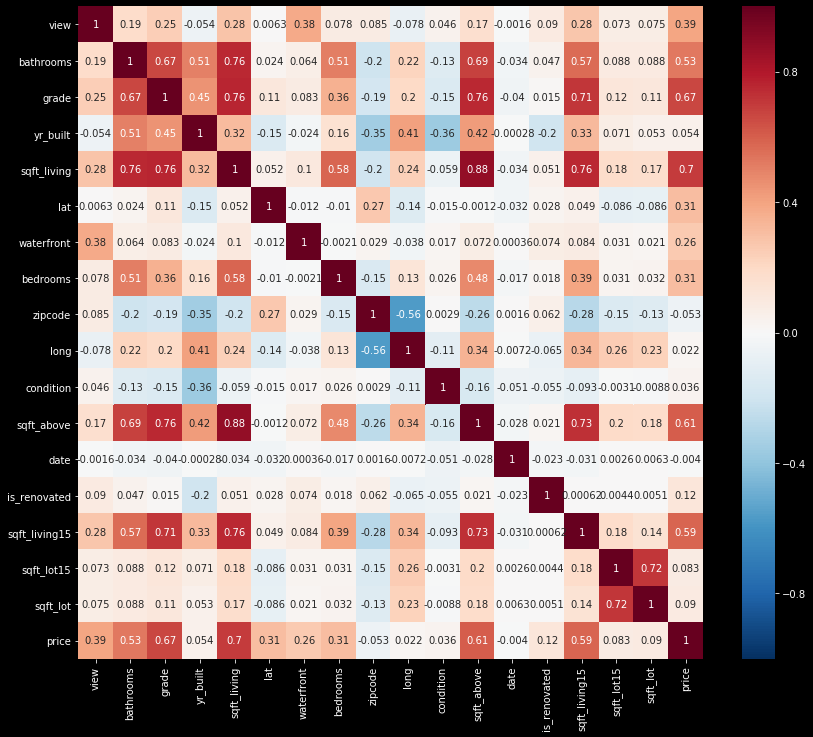

In [100]:
corr_df = pd.concat([selected,target],axis=1)
correlation = corr_df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

# Now to transform the target variable:

In [101]:
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats

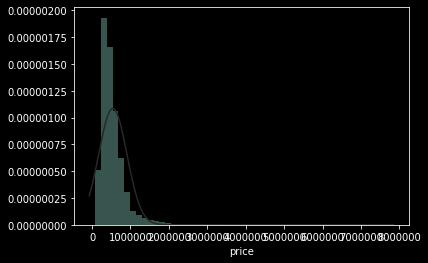

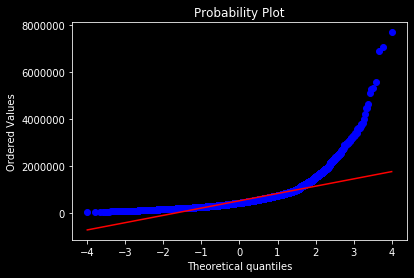

In [102]:
sns.distplot(target, fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(target, plot=plt)

In [103]:
target.skew()

4.023364652271239

In [104]:
target2 = np.log(target)

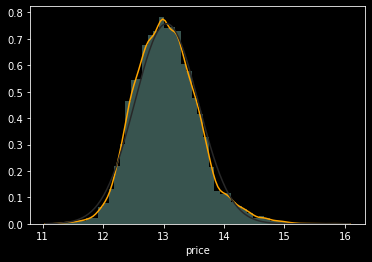

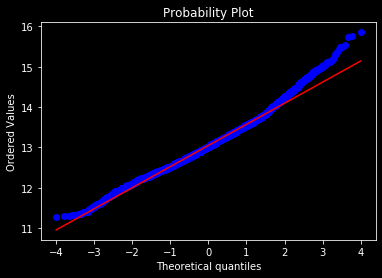

In [105]:
sns.distplot(target2, fit=norm, bins=50, kde_kws={'color':'orange'});
fig = plt.figure()
res = stats.probplot(target2, plot=plt)

In [106]:
target2.skew()

0.4310041773299232

## We can see the distribution of the target data has benefitted dramatically from log transformation

In [107]:
included = stepwise_selection(data, target2)
selected = data[included]
selected.head()

Add  view                           with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  sqft_living15                  with p-value 5.18085e-95
Add  condition                      with p-value 8.52738e-84
Add  waterfront                     with p-value 3.34106e-66
Add  floors                         with p-value 2.166e-59
Add  date                           with p-value 1.28061e-37
Add  zipcode                        with p-value 1.06572e-37
Add  has_basement                   with p-value 5.29271e-34
Add  sqft_above                     with p-value 6.45812e-18
Add  is_renovated                   with p-value 3.41613e-17
Add  long                           with p-value 8.71182e-14
Add  sqft_lot                       with p-value 1.61437e-16
Add  bedrooms

,view,bathrooms,grade,yr_built,lat,sqft_living,sqft_living15,condition,waterfront,floors,date,zipcode,has_basement,sqft_above,is_renovated,long,sqft_lot,bedrooms,sqft_lot15
0,0.0,1.00,7,1955,47.5112,1180,1340,3,0.0,1.0,735519,98178,0,1180,0,-122.257,5650,3,5650
1,0.0,2.25,7,1951,47.7210,2570,1690,3,0.0,2.0,735576,98125,1,2170,1,-122.319,7242,3,7639
2,0.0,1.00,6,1933,47.7379,770,2720,3,0.0,1.0,735654,98028,0,770,0,-122.233,10000,2,8062
3,0.0,3.00,7,1965,47.5208,1960,1360,5,0.0,1.0,735576,98136,1,1050,0,-122.393,5000,4,5000
4,0.0,2.00,8,1987,47.6168,1680,1800,3,0.0,1.0,735647,98074,0,1680,0,-122.045,8080,3,7503


In [108]:
outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target2], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3891.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:49:03   Log-Likelihood:                -727.55
No. Observations:               21597   AIC:                             1495.
Df Residuals:                   21577   BIC:                             1655.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -143.5263     11.735    -12.231      0.000    -166.528    -120.525
view              0.0633      0.003     23.967      0.000       0.058       0.069
bathrooms         0.0630      0.004     15.396      0.000       0.055       0.071
grade             0.1574      0.003     58.342      0.000       0.152       0.163
yr_built         -0.0034   8.95e-05    -38.166      0.000      -0.004      -0.003
lat               1.3944      0.013    104.276      0.000       1.368       1.421
sqft_living    7.574e-05   7.68e-06      9.856      0.000    6.07e-05    9.08e-05
sqft_living15  9.683e-05   4.29e-06     22.554      0.000    8.84e-05       0.000
condition         0.0666      0.003     22.757      0.000       0.061       0.072
waterfront        0.3810      0.023     16.888      0.000       0.337       0.425
floors            0.0777      0.004     17.346      0.000       0.069       0.087
date              0.0002   1.51e-05     12.962      0.000       0.000       0.000
zipcode          -0.0007   4.11e-05    -16.536      0.000      -0.001      -0.001
has_basement      0.0914      0.007     13.950      0.000       0.079       0.104
sqft_above     7.526e-05   8.47e-06      8.888      0.000    5.87e-05    9.19e-05
is_renovated      0.0850      0.010      8.600      0.000       0.066       0.104
long             -0.1413      0.016     -8.609      0.000      -0.173      -0.109
sqft_lot       4.568e-07   5.96e-08      7.661      0.000     3.4e-07    5.74e-07
bedrooms         -0.0124      0.002     -5.225      0.000      -0.017      -0.008
sqft_lot15    -2.627e-07   9.12e-08     -2.879      0.004   -4.42e-07   -8.39e-08
==============================================================================
Omnibus:                      360.216   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.587
Skew:                          -0.016   Prob(JB):                    2.76e-158
Kurtosis:                       3.897   Cond. No.                     5.11e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### That improved the model accuracy dramatically.

## I am going to make a loop which tries to optimize the transformation options for independent variables.

In [109]:
first_score = .774
best_score = first_score
selected2 = selected.copy()
for var in list(selected2.columns):
    print(f'Testing {var}')
    #Check to make sure log transforms not applied to variables with zeroes
    if selected2[var].min() > 0:
        df2 = selected2.copy()
        df2[var] = np.log(selected2[var])
        outcome = 'price'
        pred_sum = '+'.join(df2.columns)
        formula = outcome + '~' + pred_sum
        model = ols(formula=formula, data=pd.concat([df2, target2], axis=1)).fit()
        new_score_log = model.rsquared
    else:
        new_score_log = 0
    
    if selected2[var].min() >= 0:
        df3 = selected2.copy()
        df3[var] = np.sqrt(selected2[var])
        outcome = 'price'
        pred_sum = '+'.join(df3.columns)
        formula = outcome + '~' + pred_sum
        model = ols(formula=formula, data=pd.concat([df3, target2], axis=1)).fit()
        new_score_sqrt = model.rsquared
    
    print(f'Score for log transform: {new_score_log}')
    print(f'Score for sqrt transform: {new_score_sqrt}')
    
    if new_score_sqrt >= new_score_log:
        new_score = new_score_sqrt
        transform = 'sqrt'
    else:
        new_score = new_score_log
        transform = 'log'
        
    if new_score > best_score:
        best_score = new_score
        if transform == 'sqrt':
            selected2[var] = df3[var]
            print(f'Applied {transform} transformation to {var}')
        elif transform == 'log':
            selected2[var] = df2[var]
            print(f'Applied {transform} transformation to {var}')
        else:
            print('something went wrong')
            

outcome = 'price'
pred_sum = '+'.join(selected2.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=pd.concat([selected2, target2], axis=1)).fit()
model.summary()
    

Testing view
Score for log transform: 0
Score for sqrt transform: 0.7743207053292678
Applied sqrt transformation to view
Testing bathrooms
Score for log transform: 0.7747718092403162
Score for sqrt transform: 0.7746945374161213
Applied log transformation to bathrooms
Testing grade
Score for log transform: 0.7749219326312407
Score for sqrt transform: 0.775239761928327
Applied sqrt transformation to grade
Testing yr_built
Score for log transform: 0.775431059848934
Score for sqrt transform: 0.7753359741841781
Applied log transformation to yr_built
Testing lat
Score for log transform: 0.7755748125394095
Score for sqrt transform: 0.7755030330819622
Applied log transformation to lat
Testing sqft_living
Score for log transform: 0.7756257513319684
Score for sqrt transform: 0.7761360973577519
Applied sqrt transformation to sqft_living
Testing sqft_living15
Score for log transform: 0.7765214149159361
Score for sqrt transform: 0.7764835009665345
Applied log transformation to sqft_living15
Testing

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     3978.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:49:15   Log-Likelihood:                -543.43
No. Observations:               21597   AIC:                             1127.
Df Residuals:                   21577   BIC:                             1286.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -277.0348     12.065    -22.962      0.000    -300.683    -253.386
view              0.1109      0.004     26.268      0.000       0.103       0.119
bathrooms         0.0930      0.008     11.776      0.000       0.078       0.108
grade             0.8701      0.015     58.989      0.000       0.841       0.899
yr_built         -7.2566      0.176    -41.165      0.000      -7.602      -6.911
lat              65.3125      0.634    103.049      0.000      64.070      66.555
sqft_living       0.0107      0.001     14.430      0.000       0.009       0.012
sqft_living15     0.2015      0.009     23.325      0.000       0.185       0.218
condition         0.2401      0.011     21.640      0.000       0.218       0.262
waterfront        0.4428      0.022     20.253      0.000       0.400       0.486
floors            0.0439      0.005      9.001      0.000       0.034       0.053
date              0.0002    1.5e-05     12.871      0.000       0.000       0.000
zipcode          -0.0007   4.09e-05    -16.646      0.000      -0.001      -0.001
has_basement      0.0696      0.007     10.698      0.000       0.057       0.082
sqft_above     9.079e-05   7.72e-06     11.762      0.000    7.57e-05       0.000
is_renovated      0.0775      0.010      7.904      0.000       0.058       0.097
long             -0.1060      0.017     -6.422      0.000      -0.138      -0.074
sqft_lot         -0.0408      0.003    -12.803      0.000      -0.047      -0.035
bedrooms         -0.0812      0.008    -10.088      0.000      -0.097      -0.065
sqft_lot15     8.702e-07   8.32e-08     10.464      0.000    7.07e-07    1.03e-06
==============================================================================
Omnibus:                      395.849   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.397
Skew:                           0.072   Prob(JB):                    3.15e-173
Kurtosis:                       3.928   Cond. No.                     5.30e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
X_train, X_test, y_train, y_test = train_test_split(selected2, target2, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('R_squared',linreg.score(X_test,y_test))
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train MSE:',train_mse)
print('Test MSE:',test_mse)

R_squared 0.7770791711110484
Train MSE: 0.06117237864169254
Test MSE: 0.061654605971272994


### As can be seen in the cells above, the R squared did increase somewhat by transforming independent variables, but not enough to justify making the analysis more complicated by obfuscating the scale of the variables. I am going to standardize them instead so that the coefficients can be compared:

# Standardization:

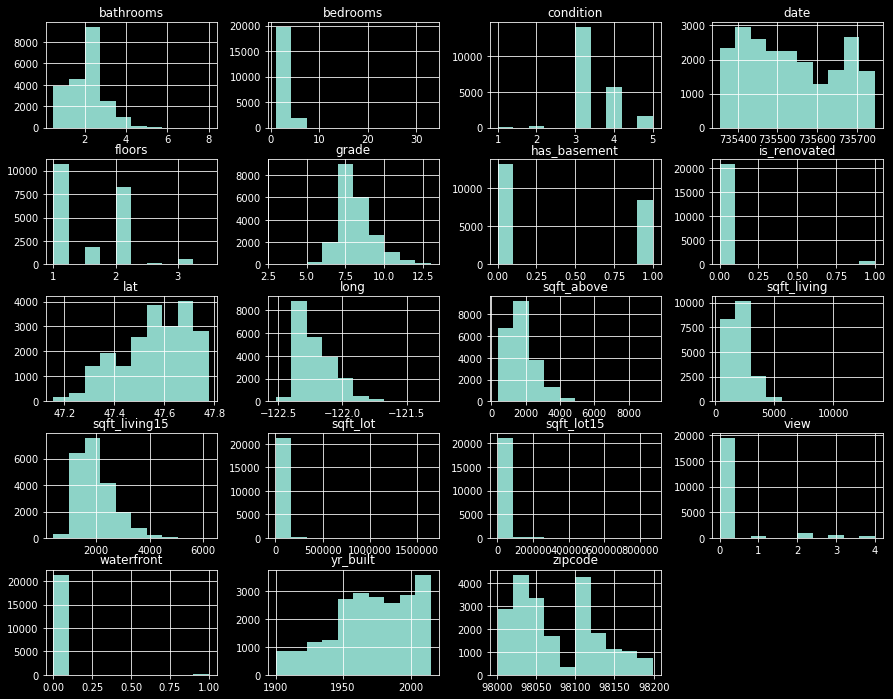

In [110]:
selected.hist(figsize=(15,12));

In [111]:
def standardize(x):
    return((x-np.mean(x))/np.sqrt(np.var(x)))

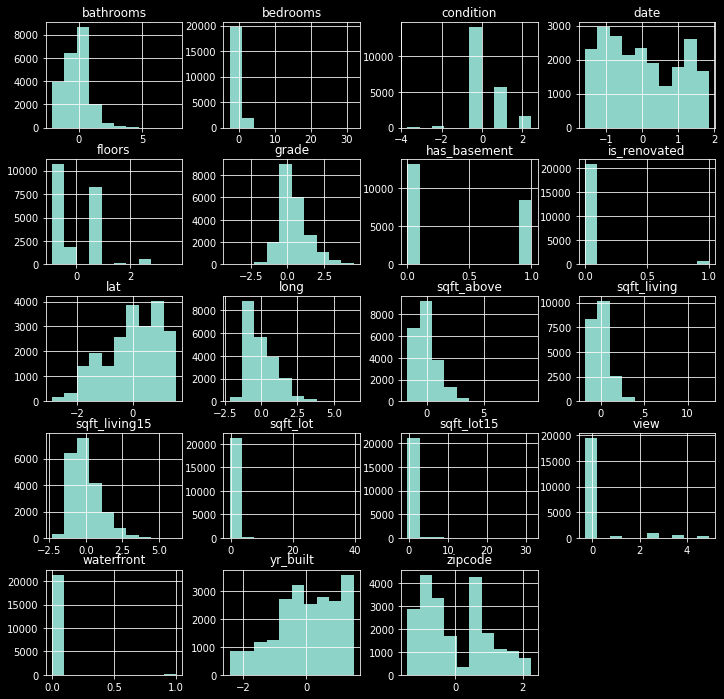

In [112]:
for_standardize = ['bathrooms','bedrooms','condition','date','floors','grade','lat','long',
                  'sqft_above','sqft_living','sqft_living15','sqft_lot','sqft_lot15','view',
                  'yr_built','zipcode']
selected3 = selected.copy()
for var in for_standardize:
    selected3[var] = standardize(selected3[var])
    
selected3.hist(figsize=(12,12));

In [113]:
outcome = 'price'
pred_sum = '+'.join(selected3.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=pd.concat([selected3, target2], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3891.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:49:48   Log-Likelihood:                -727.55
No. Observations:               21597   AIC:                             1495.
Df Residuals:                   21577   BIC:                             1655.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0068      0.003   4172.497      0.000      13.001      13.013
view              0.0484      0.002     23.967      0.000       0.044       0.052
bathrooms         0.0484      0.003     15.396      0.000       0.042       0.055
grade             0.1846      0.003     58.342      0.000       0.178       0.191
yr_built         -0.1004      0.003    -38.166      0.000      -0.106      -0.095
lat               0.1932      0.002    104.276      0.000       0.190       0.197
sqft_living       0.0695      0.007      9.856      0.000       0.056       0.083
sqft_living15     0.0663      0.003     22.554      0.000       0.061       0.072
condition         0.0433      0.002     22.757      0.000       0.040       0.047
waterfront        0.3810      0.023     16.888      0.000       0.337       0.425
floors            0.0419      0.002     17.346      0.000       0.037       0.047
date              0.0222      0.002     12.962      0.000       0.019       0.026
zipcode          -0.0364      0.002    -16.536      0.000      -0.041      -0.032
has_basement      0.0914      0.007     13.950      0.000       0.079       0.104
sqft_above        0.0623      0.007      8.888      0.000       0.049       0.076
is_renovated      0.0850      0.010      8.600      0.000       0.066       0.104
long             -0.0199      0.002     -8.609      0.000      -0.024      -0.015
sqft_lot          0.0189      0.002      7.661      0.000       0.014       0.024
bedrooms         -0.0114      0.002     -5.225      0.000      -0.016      -0.007
sqft_lot15       -0.0072      0.002     -2.879      0.004      -0.012      -0.002
==============================================================================
Omnibus:                      360.216   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.587
Skew:                          -0.016   Prob(JB):                    2.76e-158
Kurtosis:                       3.897   Cond. No.                         30.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
model.params.head()

Intercept    13.006797
view          0.048432
bathrooms     0.048445
grade         0.184612
yr_built     -0.100351
dtype: float64

In [115]:
coefficients = model.params.drop(index=['Intercept'])

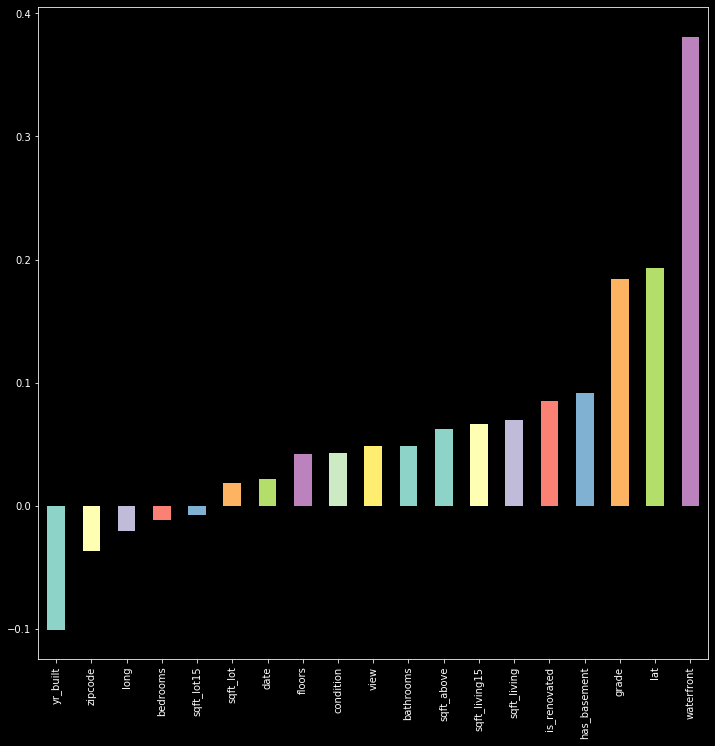

In [116]:
coefficients.sort_values().plot(kind='bar', figsize=(12,12))

# A look at Cross Validation, residuals, and model fit:

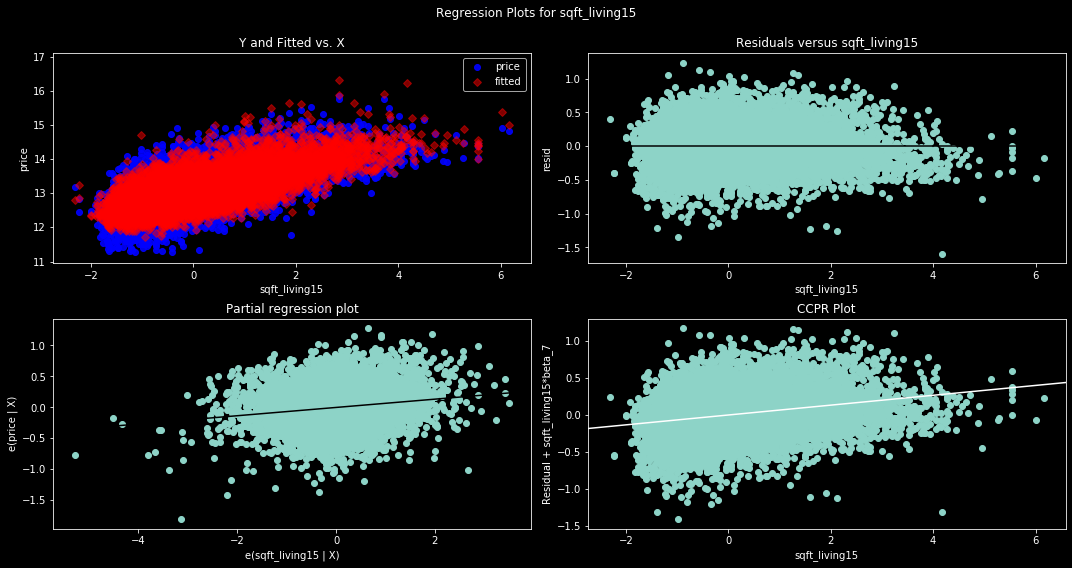

In [126]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living15',fig=fig)
plt.show()

C:\Users\indez\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


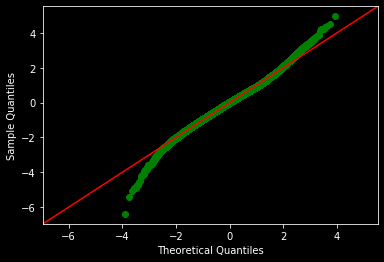

In [127]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45',fit=True, color='g')
fig.show()

In [128]:
import statsmodels.stats.api as sms

In [129]:
name=['Jarque-Bera','Prob','Skew','Kurtosis']
test= sms.jarque_bera(model.resid)
list(zip(name,test))

[('Jarque-Bera', 757.6613863700134),
 ('Prob', 2.9917160693774867e-165),
 ('Skew', -0.012294185375210487),
 ('Kurtosis', 3.917255872793645)]

In [131]:
from sklearn.model_selection import cross_val_score

r2_results = cross_val_score(linreg, selected, target2, cv=5, scoring="r2")
mse_results = cross_val_score(linreg, selected, target2, cv=5, scoring="neg_mean_squared_error")

print('Cross Validation R2 results:',r2_results)
print('    Average R2:',r2_results.mean())
print('Cross Validation MSE results:',abs(mse_results))
print('    Average MSE:',abs(mse_results.mean()))

Cross Validation R2 results: [0.77935632 0.76948126 0.76692481 0.77821531 0.76222161]
    Average R2: 0.7712398615279318
Cross Validation MSE results: [0.06356431 0.06364615 0.06211545 0.06402824 0.06247425]
    Average MSE: 0.06316567768003231


In [98]:
model.mse_resid

0.22317531742317034

# Conclusions:
 - the features have been standardized, so the coeficients can be analyzed knowing that they should be on relatively the same scale (apart from the categorical variables).
 - the most directly influential feature was 'waterfront', a binary variable telling whether the house is on waterfront property. This makes sense, as waterfront property is almost always more valuable than comparable properties which are landlocked.
 - the grade of the house was a strong predictor of price.
 - latitude had a surprisingly large impact, this indicates that the more valuable houses tend to be on one side of town. Should be looked at with reference to a map, possibly related to waterfront.
 - the renovation variables turned out to make an interesting discovery, in that more recent renovations made the houses more valuable, but the most important factor was whether the house has been renovated since 1995.
 - the yr_built feature actually had a negative correlation to price in the model, this may have something to do with the frequency of renovation between older and newer homes. It should be noted that the newest houses built after 2000 were generally not renovated, seen below.
 - the house square footage and basement square footage were decently strong predictors.
 - the 'date' feature made it into the model after all. Even though the dates were over only one year, housing markets do fluctuate in this time and anyone should take that into consideration when buying or selling a house.
 

## Business Ideas from what the data have shown:
 - Renovation is a key factor in raising a home's value. Showing this using data science could be a good way to get people to buy into renovation of their home in the hopes of getting more value out of their home sale.
 - Grade was another strong predictor of sale price. Understanding how King County grades houses may direct people on what sort of renovations would be most effective in raising their home's value.